# Notebook 2: The XOR Problem - When Intuition Breaks

## Discovering Why Two Variables Can Be Useless Alone But Powerful Together

Welcome to the most mind-bending notebook in this series! If Notebook 1 built your foundations, this notebook will shake them—in a good way. We're about to encounter a phenomenon that defies all intuition from pairwise analysis.

### The Central Puzzle

Imagine two neurons, $X_1$ and $X_2$, that encode information about a stimulus $Y$. You measure:
- $I(X_1; Y) = 0$ bits  (Neuron 1 alone tells you nothing about the stimulus)
- $I(X_2; Y) = 0$ bits  (Neuron 2 alone tells you nothing about the stimulus)

**Question**: How much information do they carry together?

**Intuitive answer**: Still 0 bits, right? $0 + 0 = 0$

**Reality**: They can carry **1 full bit** of information together!

**Your reaction**: 🤯

This is the **XOR problem**, and it's the gateway to understanding synergy, redundancy, and higher-order interactions.

### Learning Objectives

By the end of this notebook, you'll:
1. Understand the XOR function and why it's special
2. Calculate that individual MIs are zero but joint MI is maximal
3. See why Venn diagrams break for 3+ variables
4. Understand interaction information and its sign
5. Learn about "explaining away" and conditional independence
6. Build intuition for synergy vs. redundancy

Let's begin the journey!

In [15]:
# Import everything we need
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch
import seaborn as sns
from itertools import product
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Import our functions from Notebook 1
def entropy(probs):
    """Calculate entropy in bits"""
    p = np.array(probs)
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

def joint_entropy(joint_probs):
    """Calculate joint entropy H(X,Y)"""
    jp = np.array(joint_probs)
    jp = jp[jp > 0]
    return -np.sum(jp * np.log2(jp))

def mutual_information(joint_probs):
    """Calculate MI from 2D joint distribution"""
    jp = np.array(joint_probs)
    marginal_X = jp.sum(axis=1)
    marginal_Y = jp.sum(axis=0)
    return entropy(marginal_X) + entropy(marginal_Y) - joint_entropy(jp)

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
np.random.seed(42)

print("Libraries loaded! Ready to break some intuitions... 🔥")

Libraries loaded! Ready to break some intuitions... 🔥


## Part 1: The XOR Function

### What is XOR?

**XOR** (exclusive OR) is a logical operation. For binary variables:
$$Y = X_1 \text{ XOR } X_2$$

**Truth table**:
```
X₁  X₂  │  Y
─────────┼───
0   0   │  0
0   1   │  1
1   0   │  1
1   1   │  0
```

**In words**: $Y = 1$ if $X_1$ and $X_2$ are **different**, $Y = 0$ if they're the **same**.

### Why This is Special

Looking at just $X_1$:
- When $X_1 = 0$, then $Y$ could be 0 or 1 (depends on $X_2$)
- When $X_1 = 1$, then $Y$ could be 0 or 1 (depends on $X_2$)

**$X_1$ alone doesn't predict $Y$ at all!** The same is true for $X_2$.

But **together**, they predict $Y$ **perfectly**.

This is called **pure synergy**—information that exists only in the combination.

### Let's Verify This

In [16]:
# Define the XOR system
# All 8 combinations are equally likely: P = 1/4 for each (X₁, X₂, Y) triple

# Create 3D joint distribution P(X₁, X₂, Y)
# Shape: (2, 2, 2) for (X₁, X₂, Y) each binary
P_XOR = np.zeros((2, 2, 2))

# Only 4 valid combinations under XOR constraint
P_XOR[0, 0, 0] = 0.25  # X₁=0, X₂=0 → Y=0
P_XOR[0, 1, 1] = 0.25  # X₁=0, X₂=1 → Y=1
P_XOR[1, 0, 1] = 0.25  # X₁=1, X₂=0 → Y=1
P_XOR[1, 1, 0] = 0.25  # X₁=1, X₂=1 → Y=0

print("XOR System: Truth Table and Probabilities")
print("=" * 60)
print("\n X₁   X₂   Y   │  P(X₁, X₂, Y)")
print("──────────────┼───────────────")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        y = x1 ^ x2  # XOR operation in Python
        prob = P_XOR[x1, x2, y]
        print(f"  {x1}    {x2}   {y}  │    {prob:.2f}")

print("\n" + "=" * 60)
print("All combinations equally likely → Maximum uncertainty")
print("But XOR constraint creates perfect predictability when both inputs known")

XOR System: Truth Table and Probabilities

 X₁   X₂   Y   │  P(X₁, X₂, Y)
──────────────┼───────────────
  0    0   0  │    0.25
  0    1   1  │    0.25
  1    0   1  │    0.25
  1    1   0  │    0.25

All combinations equally likely → Maximum uncertainty
But XOR constraint creates perfect predictability when both inputs known


## Part 2: Calculating the Shocking Result

### Step 1: Individual Mutual Informations

Let's calculate $I(X_1; Y)$ step by step. We need the joint distribution $P(X_1, Y)$.

In [17]:
# Marginalize out X₂ to get P(X₁, Y)
P_X1_Y = P_XOR.sum(axis=1)  # Sum over X₂ (axis 1)

print("Joint Distribution P(X₁, Y):")
print("=" * 50)
print("          Y=0    Y=1")
print(f"X₁=0:    {P_X1_Y[0, 0]:.2f}   {P_X1_Y[0, 1]:.2f}")
print(f"X₁=1:    {P_X1_Y[1, 0]:.2f}   {P_X1_Y[1, 1]:.2f}")

# Calculate marginals
P_X1 = P_X1_Y.sum(axis=1)
P_Y = P_X1_Y.sum(axis=0)

print("\nMarginal Distributions:")
print(f"P(X₁=0) = {P_X1[0]:.2f}, P(X₁=1) = {P_X1[1]:.2f}")
print(f"P(Y=0) = {P_Y[0]:.2f}, P(Y=1) = {P_Y[1]:.2f}")

# Calculate mutual information
MI_X1_Y = mutual_information(P_X1_Y)

print("\n" + "=" * 50)
print(f"\n🎯 I(X₁; Y) = {MI_X1_Y:.10f} bits")

if MI_X1_Y < 1e-10:
    print("\n✨ Exactly ZERO! X₁ tells us nothing about Y.")
else:
    print(f"\n⚠️  Small but non-zero (numerical error: {MI_X1_Y:.2e})")

Joint Distribution P(X₁, Y):
          Y=0    Y=1
X₁=0:    0.25   0.25
X₁=1:    0.25   0.25

Marginal Distributions:
P(X₁=0) = 0.50, P(X₁=1) = 0.50
P(Y=0) = 0.50, P(Y=1) = 0.50


🎯 I(X₁; Y) = 0.0000000000 bits

✨ Exactly ZERO! X₁ tells us nothing about Y.


### Understanding Why I(X₁; Y) = 0

Look at the joint distribution we just printed. Notice:
- $P(X_1 = 0, Y = 0) = P(X_1 = 0, Y = 1) = 0.25$
- $P(X_1 = 1, Y = 0) = P(X_1 = 1, Y = 1) = 0.25$

**This means**: 
- Given $X_1 = 0$, both values of $Y$ are equally likely (50-50)
- Given $X_1 = 1$, both values of $Y$ are equally likely (50-50)

**Therefore**: Learning $X_1$ doesn't reduce our uncertainty about $Y$ at all!

$$H(Y|X_1) = H(Y) = 1 \text{ bit}$$

So:
$$I(X_1; Y) = H(Y) - H(Y|X_1) = 1 - 1 = 0$$

### By Symmetry, I(X₂; Y) = 0 Too

In [18]:
# Calculate I(X₂; Y)
P_X2_Y = P_XOR.sum(axis=0)  # Sum over X₁ (axis 0)
MI_X2_Y = mutual_information(P_X2_Y)

print("By symmetry:")
print(f"I(X₂; Y) = {MI_X2_Y:.10f} bits")
print("\n💡 Neither variable alone tells us ANYTHING about Y!")
print("   This is the key surprise of the XOR problem.")

By symmetry:
I(X₂; Y) = 0.0000000000 bits

💡 Neither variable alone tells us ANYTHING about Y!
   This is the key surprise of the XOR problem.


### Step 2: Joint Mutual Information

Now let's see what happens when we consider **both** $X_1$ and $X_2$ together.

We need to calculate $I(X_1, X_2; Y)$, which measures how much knowing **both** $X_1$ and $X_2$ tells us about $Y$.

In [19]:
def joint_mi_three_vars(P_XYZ):
    """
    Calculate I(X,Y; Z) from 3D joint distribution.
    
    I(X,Y; Z) = H(Z) - H(Z|X,Y)
              = H(X,Y) + H(Z) - H(X,Y,Z)
    """
    # Flatten to 2D: combine X,Y into single variable
    n_x, n_y, n_z = P_XYZ.shape
    P_XY_Z = P_XYZ.reshape(n_x * n_y, n_z)
    
    # Remove zero entries
    marginal_XY = P_XY_Z.sum(axis=1)
    marginal_Z = P_XY_Z.sum(axis=0)
    
    # Calculate H(X,Y), H(Z), H(X,Y,Z)
    H_XY = entropy(marginal_XY)
    H_Z = entropy(marginal_Z)
    H_XYZ = joint_entropy(P_XY_Z)
    
    return H_XY + H_Z - H_XYZ

# Calculate I(X₁, X₂; Y)
MI_X1X2_Y = joint_mi_three_vars(P_XOR)

print("Joint Mutual Information")
print("=" * 60)
print(f"\nI(X₁, X₂; Y) = {MI_X1X2_Y:.10f} bits")

# Let's verify this by checking H(Y|X₁,X₂)
# When we know both X₁ and X₂, we know Y perfectly (deterministic)
print("\nVerification:")
print("When we know both X₁ and X₂, Y is deterministic")
print("Therefore: H(Y|X₁,X₂) = 0")
print(f"So: I(X₁,X₂; Y) = H(Y) - H(Y|X₁,X₂) = 1 - 0 = 1 bit ✓")

print("\n" + "=" * 60)
print("\n🤯 THE SHOCKING RESULT:")
print("=" * 60)
print(f"  I(X₁; Y) = {MI_X1_Y:.1f} bits")
print(f"  I(X₂; Y) = {MI_X2_Y:.1f} bits")
print(f"  I(X₁, X₂; Y) = {MI_X1X2_Y:.1f} bit")
print("\n  0 + 0 = 1 in information theory! 🎩✨")
print("\n  The information exists only in the COMBINATION.")
print("  This is the essence of SYNERGY.")

Joint Mutual Information

I(X₁, X₂; Y) = 1.0000000000 bits

Verification:
When we know both X₁ and X₂, Y is deterministic
Therefore: H(Y|X₁,X₂) = 0
So: I(X₁,X₂; Y) = H(Y) - H(Y|X₁,X₂) = 1 - 0 = 1 bit ✓


🤯 THE SHOCKING RESULT:
  I(X₁; Y) = 0.0 bits
  I(X₂; Y) = 0.0 bits
  I(X₁, X₂; Y) = 1.0 bit

  0 + 0 = 1 in information theory! 🎩✨

  The information exists only in the COMBINATION.
  This is the essence of SYNERGY.


### Visualizing the XOR Paradox

Let's create a visual representation of this mind-bending result:

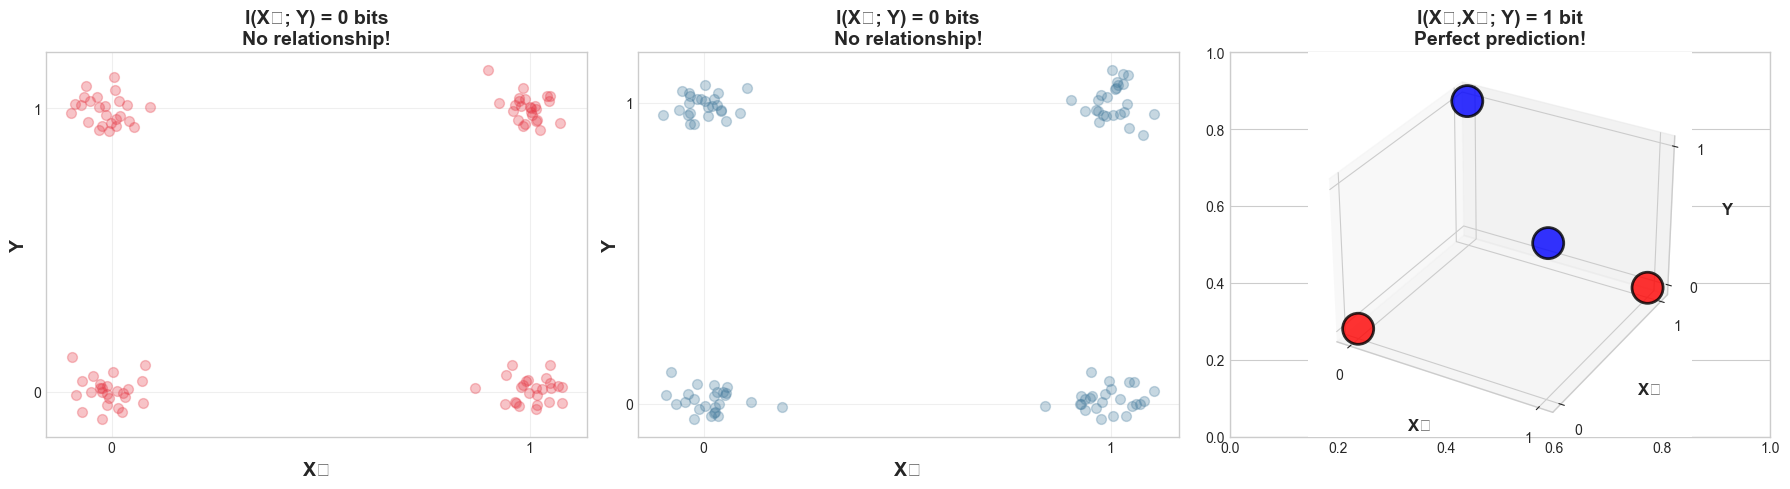


Key Insight from Visualization:
Left two panels: Complete overlap → No predictability
Right panel: Perfect separation → Complete predictability

The structure is only visible in the JOINT space!


In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Panel 1: X₁ vs Y
ax1 = axes[0]
scatter_data_1 = []
for x1 in [0, 1]:
    for y in [0, 1]:
        count = int(P_X1_Y[x1, y] * 100)  # Number of points
        scatter_data_1.extend([(x1, y)] * count)
scatter_data_1 = np.array(scatter_data_1)
ax1.scatter(scatter_data_1[:, 0] + np.random.randn(len(scatter_data_1)) * 0.05, 
            scatter_data_1[:, 1] + np.random.randn(len(scatter_data_1)) * 0.05,
            alpha=0.3, s=50, color='#E63946')
ax1.set_xlabel('X₁', fontsize=14, fontweight='bold')
ax1.set_ylabel('Y', fontsize=14, fontweight='bold')
ax1.set_title(f'I(X₁; Y) = 0 bits\nNo relationship!', fontsize=14, fontweight='bold')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.grid(True, alpha=0.3)

# Panel 2: X₂ vs Y
ax2 = axes[1]
scatter_data_2 = []
for x2 in [0, 1]:
    for y in [0, 1]:
        count = int(P_X2_Y[x2, y] * 100)
        scatter_data_2.extend([(x2, y)] * count)
scatter_data_2 = np.array(scatter_data_2)
ax2.scatter(scatter_data_2[:, 0] + np.random.randn(len(scatter_data_2)) * 0.05,
            scatter_data_2[:, 1] + np.random.randn(len(scatter_data_2)) * 0.05,
            alpha=0.3, s=50, color='#457B9D')
ax2.set_xlabel('X₂', fontsize=14, fontweight='bold')
ax2.set_ylabel('Y', fontsize=14, fontweight='bold')
ax2.set_title(f'I(X₂; Y) = 0 bits\nNo relationship!', fontsize=14, fontweight='bold')
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.grid(True, alpha=0.3)

# Panel 3: 3D view showing XOR structure
ax3 = fig.add_subplot(133, projection='3d')
colors = ['red' if y == 0 else 'blue' for y in [0, 1, 1, 0]]
x1_vals = [0, 0, 1, 1]
x2_vals = [0, 1, 0, 1]
y_vals = [0, 1, 1, 0]
ax3.scatter(x1_vals, x2_vals, y_vals, c=colors, s=500, alpha=0.8, edgecolors='black', linewidth=2)
ax3.set_xlabel('X₁', fontsize=12, fontweight='bold')
ax3.set_ylabel('X₂', fontsize=12, fontweight='bold')
ax3.set_zlabel('Y', fontsize=12, fontweight='bold')
ax3.set_title('I(X₁,X₂; Y) = 1 bit\nPerfect prediction!', fontsize=14, fontweight='bold')
ax3.set_xticks([0, 1])
ax3.set_yticks([0, 1])
ax3.set_zticks([0, 1])

plt.tight_layout()
plt.show()

print("\nKey Insight from Visualization:")
print("Left two panels: Complete overlap → No predictability")
print("Right panel: Perfect separation → Complete predictability")
print("\nThe structure is only visible in the JOINT space!")

## Part 3: Why the Venn Diagram Breaks

### The Two-Variable Venn Diagram (It Works!)

For two variables, we can represent information as overlapping circles. The overlap is the mutual information.

### The Three-Variable Venn Diagram (It Breaks!)

With three variables, we'd naively draw three overlapping circles. But what goes in the center (the triple overlap)?

For the XOR case:
- Each circle represents $H(X_1)$, $H(X_2)$, $H(Y)$ = 1 bit each
- The pairwise overlaps: $I(X_1; Y) = I(X_2; Y) = I(X_1; X_2) = 0$ bits
- But $I(X_1, X_2; Y) = 1$ bit!

**The Problem**: If pairwise overlaps are zero, where does this 1 bit live?

**The Answer**: It must be in the center (triple overlap). But then we'd need:
$$\text{Center region} = I(X_1, X_2; Y) - I(X_1; Y) - I(X_2; Y) + \text{"corrections"} = 1 - 0 - 0 = 1$$

But wait... there are **no** pairwise overlaps to "get to" this center!

Let's visualize this impossibility:

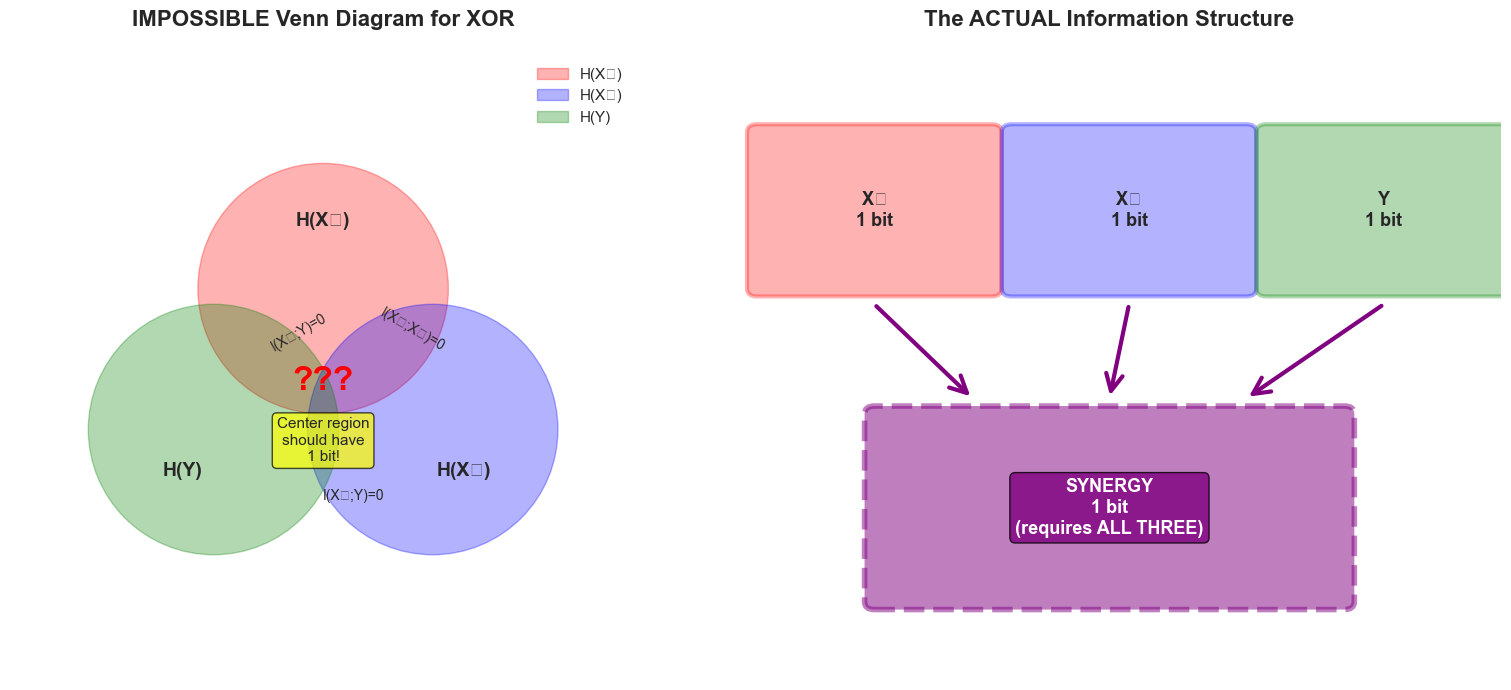


🚨 CRITICAL INSIGHT:
Venn diagrams ONLY work for 2 variables!

For 3+ variables, we need a different framework:
  → Interaction Information (can be negative!)
  → Partial Information Decomposition (PID)

These are what HOI package implements! (Next notebook)


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left: Standard 3-way Venn
from matplotlib.patches import Ellipse
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_aspect('equal')
ax1.axis('off')

# Draw three circles
c1 = Circle((0, 0.5), 0.8, alpha=0.3, color='red', label='H(X₁)')
c2 = Circle((0.7, -0.4), 0.8, alpha=0.3, color='blue', label='H(X₂)')
c3 = Circle((-0.7, -0.4), 0.8, alpha=0.3, color='green', label='H(Y)')
ax1.add_patch(c1)
ax1.add_patch(c2)
ax1.add_patch(c3)

# Label regions
ax1.text(0, 0.9, 'H(X₁)', ha='center', fontsize=14, fontweight='bold')
ax1.text(0.9, -0.7, 'H(X₂)', ha='center', fontsize=14, fontweight='bold')
ax1.text(-0.9, -0.7, 'H(Y)', ha='center', fontsize=14, fontweight='bold')
ax1.text(0, -0.15, '???', ha='center', fontsize=24, fontweight='bold', color='red')
ax1.text(0, -0.6, 'Center region\nshould have\n1 bit!', ha='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Pairwise overlaps are 0
ax1.text(0.35, 0.1, 'I(X₁;X₂)=0', fontsize=10, rotation=-30)
ax1.text(-0.35, 0.1, 'I(X₁;Y)=0', fontsize=10, rotation=30)
ax1.text(0, -0.85, 'I(X₂;Y)=0', fontsize=10)

ax1.set_title('IMPOSSIBLE Venn Diagram for XOR', fontsize=16, fontweight='bold', pad=20)
ax1.legend(loc='upper right', fontsize=11)

# Right: The truth - information structure
ax2.set_xlim(0, 4)
ax2.set_ylim(0, 4)
ax2.axis('off')

# Draw boxes for each variable's entropy
box1 = FancyBboxPatch((0.2, 2.5), 1.2, 1, boxstyle="round,pad=0.05", 
                       edgecolor='red', facecolor='red', alpha=0.3, linewidth=3)
box2 = FancyBboxPatch((1.5, 2.5), 1.2, 1, boxstyle="round,pad=0.05",
                       edgecolor='blue', facecolor='blue', alpha=0.3, linewidth=3)
box3 = FancyBboxPatch((2.8, 2.5), 1.2, 1, boxstyle="round,pad=0.05",
                       edgecolor='green', facecolor='green', alpha=0.3, linewidth=3)
ax2.add_patch(box1)
ax2.add_patch(box2)
ax2.add_patch(box3)

ax2.text(0.8, 3, 'X₁\n1 bit', ha='center', va='center', fontsize=13, fontweight='bold')
ax2.text(2.1, 3, 'X₂\n1 bit', ha='center', va='center', fontsize=13, fontweight='bold')
ax2.text(3.4, 3, 'Y\n1 bit', ha='center', va='center', fontsize=13, fontweight='bold')

# Draw synergy region
synergy_box = FancyBboxPatch((0.8, 0.5), 2.4, 1.2, boxstyle="round,pad=0.05",
                              edgecolor='purple', facecolor='purple', 
                              alpha=0.5, linewidth=4, linestyle='dashed')
ax2.add_patch(synergy_box)
ax2.text(2, 1.1, 'SYNERGY\n1 bit\n(requires ALL THREE)', ha='center', va='center',
         fontsize=13, fontweight='bold', color='white',
         bbox=dict(boxstyle='round', facecolor='purple', alpha=0.8))

# Draw arrows
arrow1 = FancyArrowPatch((0.8, 2.4), (1.3, 1.8), 
                         arrowstyle='->', mutation_scale=30, linewidth=3, color='purple')
arrow2 = FancyArrowPatch((2.1, 2.4), (2, 1.8),
                         arrowstyle='->', mutation_scale=30, linewidth=3, color='purple')
arrow3 = FancyArrowPatch((3.4, 2.4), (2.7, 1.8),
                         arrowstyle='->', mutation_scale=30, linewidth=3, color='purple')
ax2.add_patch(arrow1)
ax2.add_patch(arrow2)
ax2.add_patch(arrow3)

ax2.set_title('The ACTUAL Information Structure', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n🚨 CRITICAL INSIGHT:")
print("=" * 60)
print("Venn diagrams ONLY work for 2 variables!")
print("\nFor 3+ variables, we need a different framework:")
print("  → Interaction Information (can be negative!)")
print("  → Partial Information Decomposition (PID)")
print("\nThese are what HOI package implements! (Next notebook)")

## Part 4: Interaction Information

### The Solution: A Signed Measure

**Interaction Information** for three variables is defined as:

$$I(X_1; X_2; Y) = I(X_1; X_2) - I(X_1; X_2 | Y)$$

Alternatively:
$$I(X_1; X_2; Y) = I(X_1; Y) - I(X_1; Y | X_2)$$

Or in the **surprise form**:
$$I(X_1; X_2; Y) = I(X_1; Y) + I(X_2; Y) + I(X_1; X_2) - I(X_1, X_2; Y)$$

### Key Property: Can Be Negative!

Unlike mutual information (always ≥ 0), interaction information can be:
- **Positive**: Redundancy (common cause structure)
- **Zero**: No higher-order interaction
- **Negative**: Synergy (XOR-like structure)

### For XOR, Interaction Information is Negative

In [22]:
def interaction_information(P_XYZ):
    """
    Calculate interaction information I(X;Y;Z).
    
    Using: I(X;Y;Z) = I(X;Y) + I(X;Z) + I(Y;Z) - I(X;YZ) - I(Y;XZ) - I(Z;XY) + I(X;Y;Z)
    
    Simplified form:
    I(X;Y;Z) = I(X;Y) - I(X;Y|Z)
    
    Convention: Negative means synergy (as in XOR)
    """
    # Get all pairwise MIs
    P_X_Y = P_XYZ.sum(axis=1)  # Marginalize Z
    P_X_Z = P_XYZ.sum(axis=2).T  # Marginalize Y and transpose
    P_Y_Z = P_XYZ.sum(axis=0)  # Marginalize X
    
    I_XY = mutual_information(P_X_Y)
    I_XZ = mutual_information(P_X_Z)
    I_YZ = mutual_information(P_Y_Z)
    
    # Get three-way MI
    I_XYZ = joint_mi_three_vars(P_XYZ)
    
    # Interaction information
    II = I_XY + I_XZ + I_YZ - I_XYZ
    
    return II

# Calculate for XOR
II_XOR = interaction_information(P_XOR)

print("Interaction Information for XOR")
print("=" * 60)
print(f"\nI(X₁; X₂; Y) = {II_XOR:.4f} bits")

if II_XOR < 0:
    print("\n✅ NEGATIVE! This indicates SYNERGY.")
    print("\nInterpretation:")
    print("  The three variables together have LESS pairwise structure")
    print("  than you'd expect from their marginals.")
    print("  The information is 'hidden' in the triple interaction!")
    
# Let's verify the calculation
print("\n" + "=" * 60)
print("Verification using alternative form:")
print("I(X₁; X₂; Y) = I(X₁;Y) + I(X₂;Y) + I(X₁;X₂) - I(X₁,X₂;Y)")
print(f"            = {MI_X1_Y:.1f} + {MI_X2_Y:.1f} + 0 - {MI_X1X2_Y:.1f}")
print(f"            = {MI_X1_Y + MI_X2_Y + 0 - MI_X1X2_Y:.4f} bits ✓")

Interaction Information for XOR

I(X₁; X₂; Y) = -1.0000 bits

✅ NEGATIVE! This indicates SYNERGY.

Interpretation:
  The three variables together have LESS pairwise structure
  than you'd expect from their marginals.
  The information is 'hidden' in the triple interaction!

Verification using alternative form:
I(X₁; X₂; Y) = I(X₁;Y) + I(X₂;Y) + I(X₁;X₂) - I(X₁,X₂;Y)
            = 0.0 + 0.0 + 0 - 1.0
            = -1.0000 bits ✓


### Interpreting the Sign of Interaction Information

Let's create examples of all three cases to build intuition:

In [23]:
# Case 1: XOR (Synergy) - We already have this
II_synergy = II_XOR

# Case 2: Common cause (Redundancy)
# Z causes both X and Y
P_redundancy = np.zeros((2, 2, 2))
# When Z=0: X=0, Y=0 with high prob
P_redundancy[0, 0, 0] = 0.4
P_redundancy[1, 0, 0] = 0.05
P_redundancy[0, 1, 0] = 0.05
# When Z=1: X=1, Y=1 with high prob  
P_redundancy[1, 1, 1] = 0.4
P_redundancy[0, 1, 1] = 0.05
P_redundancy[1, 0, 1] = 0.05

II_redundancy = interaction_information(P_redundancy)

# Case 3: Independent (No interaction)
P_independent = np.zeros((2, 2, 2))
for i, j, k in product([0, 1], repeat=3):
    P_independent[i, j, k] = 0.125  # All equally likely

II_independent = interaction_information(P_independent)

# Display results
print("Comparison of Interaction Information")
print("=" * 60)
print("\n1. XOR (Pure Synergy):")
print(f"   I(X₁; X₂; Y) = {II_synergy:.4f} bits (NEGATIVE)")
print("   → Information emerges from combination")
print("   → Neither variable alone helps")

print("\n2. Common Cause (Redundancy):")
print(f"   I(X₁; X₂; Y) = {II_redundancy:.4f} bits (POSITIVE)")
print("   → Variables carry overlapping information")
print("   → Learning one reduces value of the other")

print("\n3. Independent Variables:")
print(f"   I(X₁; X₂; Y) = {II_independent:.6f} bits (≈ ZERO)")
print("   → No higher-order structure")
print("   → Pairwise analysis is sufficient")

print("\n" + "=" * 60)
print("Key Insight: The SIGN tells you the information structure!")

Comparison of Interaction Information

1. XOR (Pure Synergy):
   I(X₁; X₂; Y) = -1.0000 bits (NEGATIVE)
   → Information emerges from combination
   → Neither variable alone helps

2. Common Cause (Redundancy):
   I(X₁; X₂; Y) = 0.5401 bits (POSITIVE)
   → Variables carry overlapping information
   → Learning one reduces value of the other

3. Independent Variables:
   I(X₁; X₂; Y) = 0.000000 bits (≈ ZERO)
   → No higher-order structure
   → Pairwise analysis is sufficient

Key Insight: The SIGN tells you the information structure!


### Visualizing Interaction Information Across Structures

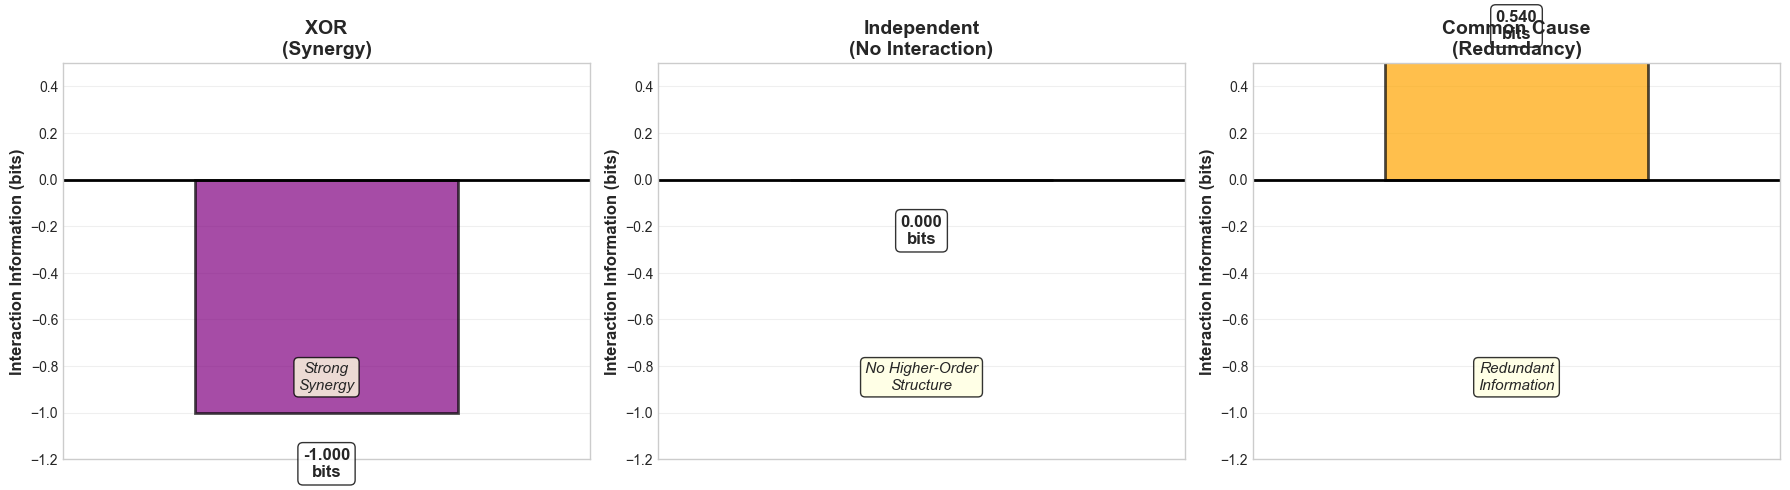


💡 Remember:
  Negative II = Information hidden in combinations (synergy)
  Positive II = Information duplicated across variables (redundancy)
  Zero II = No higher-order interactions


In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

structures = [
    ('XOR\n(Synergy)', II_synergy, 'purple'),
    ('Independent\n(No Interaction)', II_independent, 'gray'),
    ('Common Cause\n(Redundancy)', II_redundancy, 'orange')
]

for idx, (name, value, color) in enumerate(structures):
    ax = axes[idx]
    
    # Bar plot
    bar = ax.bar([0], [value], color=color, alpha=0.7, width=0.5, edgecolor='black', linewidth=2)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
    ax.set_ylim(-1.2, 0.5)
    ax.set_xlim(-0.5, 0.5)
    ax.set_xticks([])
    ax.set_ylabel('Interaction Information (bits)', fontsize=12, fontweight='bold')
    ax.set_title(name, fontsize=14, fontweight='bold')
    
    # Add value label
    y_pos = value + (0.05 if value > 0 else -0.15)
    ax.text(0, y_pos, f'{value:.3f}\nbits', ha='center', va='bottom' if value > 0 else 'top',
            fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add interpretation
    if value < -0.5:
        interpretation = 'Strong\nSynergy'
        y_text = -0.9
    elif value > 0.1:
        interpretation = 'Redundant\nInformation'
        y_text = -0.9
    else:
        interpretation = 'No Higher-Order\nStructure'
        y_text = -0.9
    
    ax.text(0, y_text, interpretation, ha='center', fontsize=11, style='italic',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 Remember:")
print("  Negative II = Information hidden in combinations (synergy)")
print("  Positive II = Information duplicated across variables (redundancy)")
print("  Zero II = No higher-order interactions")

## Part 5: The Copy Problem (Pure Redundancy)

### The Opposite of XOR

To fully understand synergy, we need to see its opposite: **pure redundancy**.

**Setup**: $X_2 = X_1$ (perfect copy), and $Y = X_1$

Truth table:
```
X₁  X₂  │  Y
─────────┼───
0   0   │  0
1   1   │  1
```

What do you predict will happen here?

In [25]:
# Create the COPY system
P_COPY = np.zeros((2, 2, 2))
P_COPY[0, 0, 0] = 0.5  # X₁=0, X₂=0, Y=0
P_COPY[1, 1, 1] = 0.5  # X₁=1, X₂=1, Y=1

# Calculate all mutual informations
P_X1_Y_copy = P_COPY.sum(axis=1)
P_X2_Y_copy = P_COPY.sum(axis=0)

MI_X1_Y_copy = mutual_information(P_X1_Y_copy)
MI_X2_Y_copy = mutual_information(P_X2_Y_copy)
MI_X1X2_Y_copy = joint_mi_three_vars(P_COPY)
II_COPY = interaction_information(P_COPY)

print("COPY System: X₂ = X₁, Y = X₁")
print("=" * 60)
print("\nMutual Informations:")
print(f"  I(X₁; Y) = {MI_X1_Y_copy:.4f} bits")
print(f"  I(X₂; Y) = {MI_X2_Y_copy:.4f} bits")
print(f"  I(X₁, X₂; Y) = {MI_X1X2_Y_copy:.4f} bits")
print(f"\n  Interaction Information: {II_COPY:.4f} bits")

print("\n" + "=" * 60)
print("Interpretation:")
print("  - Each variable ALONE perfectly predicts Y (1 bit)")
print("  - Together, they still provide only 1 bit total")
print("  - The information is REDUNDANT (duplicated)")
print(f"  - Interaction Info is POSITIVE: {II_COPY:.1f} bit")
print("\n  This is the OPPOSITE of XOR!")

COPY System: X₂ = X₁, Y = X₁

Mutual Informations:
  I(X₁; Y) = 1.0000 bits
  I(X₂; Y) = 1.0000 bits
  I(X₁, X₂; Y) = 1.0000 bits

  Interaction Information: 2.0000 bits

Interpretation:
  - Each variable ALONE perfectly predicts Y (1 bit)
  - Together, they still provide only 1 bit total
  - The information is REDUNDANT (duplicated)
  - Interaction Info is POSITIVE: 2.0 bit

  This is the OPPOSITE of XOR!


### XOR vs COPY: Side-by-Side Comparison

Let's create a comprehensive comparison to cement these concepts:

In [26]:
# Create comparison table
comparison_data = {
    'Measure': [
        'I(X₁; Y)',
        'I(X₂; Y)',
        'I(X₁, X₂; Y)',
        'I(X₁; X₂; Y)',
        'Type'
    ],
    'XOR (Synergy)': [
        f'{MI_X1_Y:.1f}',
        f'{MI_X2_Y:.1f}',
        f'{MI_X1X2_Y:.1f}',
        f'{II_XOR:.1f}',
        'Pure Synergy'
    ],
    'COPY (Redundancy)': [
        f'{MI_X1_Y_copy:.1f}',
        f'{MI_X2_Y_copy:.1f}',
        f'{MI_X1X2_Y_copy:.1f}',
        f'{II_COPY:.1f}',
        'Pure Redundancy'
    ]
}

df = pd.DataFrame(comparison_data)
print("\nXOR vs COPY: The Two Extremes")
print("=" * 70)
print(df.to_string(index=False))
print("=" * 70)

print("\n🎯 KEY INSIGHTS:")
print("\nSYNERGY (XOR):")
print("  • Individual variables: Useless (0 bits)")
print("  • Combined: Perfect prediction (1 bit)")
print("  • Information 'emerges' from combination")
print("  • Interaction information: NEGATIVE")

print("\nREDUNDANCY (COPY):")
print("  • Individual variables: Perfect (1 bit each)")
print("  • Combined: No additional info (still 1 bit)")
print("  • Information 'duplicated' across variables")
print("  • Interaction information: POSITIVE")

print("\n" + "=" * 70)
print("Real systems typically have MIXTURES of both synergy and redundancy!")
print("That's what Partial Information Decomposition (PID) quantifies.")
print("We'll explore PID in Notebook 3 using the HOI package!")


XOR vs COPY: The Two Extremes
     Measure XOR (Synergy) COPY (Redundancy)
    I(X₁; Y)           0.0               1.0
    I(X₂; Y)           0.0               1.0
I(X₁, X₂; Y)           1.0               1.0
I(X₁; X₂; Y)          -1.0               2.0
        Type  Pure Synergy   Pure Redundancy

🎯 KEY INSIGHTS:

SYNERGY (XOR):
  • Individual variables: Useless (0 bits)
  • Combined: Perfect prediction (1 bit)
  • Information 'emerges' from combination
  • Interaction information: NEGATIVE

REDUNDANCY (COPY):
  • Individual variables: Perfect (1 bit each)
  • Combined: No additional info (still 1 bit)
  • Information 'duplicated' across variables
  • Interaction information: POSITIVE

Real systems typically have MIXTURES of both synergy and redundancy!
That's what Partial Information Decomposition (PID) quantifies.
We'll explore PID in Notebook 3 using the HOI package!


## Part 6: The Explaining Away Effect

### When Conditioning Increases Dependence

We mentioned earlier that conditioning can **increase** mutual information. This phenomenon, called "explaining away," is crucial for understanding conditional independence.

### The Classic Example: Alarm System

Imagine:
- $X_1$ = Earthquake (0 = no, 1 = yes)
- $X_2$ = Burglary (0 = no, 1 = yes)  
- $Y$ = Alarm rings (0 = silent, 1 = ringing)

**Without knowing if alarm rang**: Earthquakes and burglaries are independent events.

**After hearing alarm**: If you learn there was an earthquake, that **explains away** the alarm, making burglary less likely!

Therefore: $I(X_1; X_2) = 0$ but $I(X_1; X_2 | Y) > 0$

This means $I(X_1; X_2; Y) > 0$ (positive interaction information = redundancy).

In [27]:
# Create alarm system distribution
P_alarm = np.zeros((2, 2, 2))  # (Earthquake, Burglary, Alarm)

# Prior probabilities (very low)
p_earthquake = 0.01
p_burglary = 0.02

# Alarm probabilities
p_alarm_both = 0.99  # If both → almost certainly rings
p_alarm_quake = 0.90  # If earthquake alone
p_alarm_burg = 0.85   # If burglary alone
p_alarm_neither = 0.01  # False alarm rate

# Fill in the joint distribution
# No earthquake, no burglary
P_alarm[0, 0, 0] = (1 - p_earthquake) * (1 - p_burglary) * (1 - p_alarm_neither)
P_alarm[0, 0, 1] = (1 - p_earthquake) * (1 - p_burglary) * p_alarm_neither

# Earthquake, no burglary
P_alarm[1, 0, 0] = p_earthquake * (1 - p_burglary) * (1 - p_alarm_quake)
P_alarm[1, 0, 1] = p_earthquake * (1 - p_burglary) * p_alarm_quake

# No earthquake, burglary
P_alarm[0, 1, 0] = (1 - p_earthquake) * p_burglary * (1 - p_alarm_burg)
P_alarm[0, 1, 1] = (1 - p_earthquake) * p_burglary * p_alarm_burg

# Both
P_alarm[1, 1, 0] = p_earthquake * p_burglary * (1 - p_alarm_both)
P_alarm[1, 1, 1] = p_earthquake * p_burglary * p_alarm_both

# Calculate unconditional MI
P_E_B = P_alarm.sum(axis=2)  # Marginalize alarm
MI_E_B = mutual_information(P_E_B)

# Calculate conditional MI given alarm = 1
# P(E, B | Alarm=1)
P_alarm_1 = P_alarm[:, :, 1].sum()
if P_alarm_1 > 0:
    P_E_B_given_alarm = P_alarm[:, :, 1] / P_alarm_1
    MI_E_B_given_alarm = mutual_information(P_E_B_given_alarm)
else:
    MI_E_B_given_alarm = 0

print("Explaining Away: The Alarm System")
print("=" * 60)
print("\nScenario: Earthquake and Burglary both trigger alarm")
print("\nMutual Information:")
print(f"  I(Earthquake; Burglary) = {MI_E_B:.6f} bits")
print(f"  I(Earthquake; Burglary | Alarm=1) = {MI_E_B_given_alarm:.4f} bits")

if MI_E_B_given_alarm > MI_E_B:
    increase = MI_E_B_given_alarm - MI_E_B
    print(f"\n  ⬆️  Conditioning INCREASED MI by {increase:.4f} bits!")
    print("\nInterpretation:")
    print("  • Before knowing alarm status: Events are independent")
    print("  • After hearing alarm: They become dependent!")
    print("  • Learning 'earthquake' explains away 'burglary' hypothesis")
    print("\n  This violates our Venn diagram intuition!")

print("\n" + "=" * 60)
print("This is why we need multivariate measures!")
print("Pairwise MI alone misses these higher-order dependencies.")

Explaining Away: The Alarm System

Scenario: Earthquake and Burglary both trigger alarm

Mutual Information:
  I(Earthquake; Burglary) = -0.000000 bits
  I(Earthquake; Burglary | Alarm=1) = 0.2531 bits

  ⬆️  Conditioning INCREASED MI by 0.2531 bits!

Interpretation:
  • Before knowing alarm status: Events are independent
  • After hearing alarm: They become dependent!
  • Learning 'earthquake' explains away 'burglary' hypothesis

  This violates our Venn diagram intuition!

This is why we need multivariate measures!
Pairwise MI alone misses these higher-order dependencies.


## Summary and Next Steps

### What We've Discovered

Congratulations! You've just experienced one of the most important "aha!" moments in information theory:

1. **XOR Problem**: Two variables can individually carry zero information yet together carry maximal information
2. **Venn Diagrams Fail**: The classic visualization breaks down for 3+ variables
3. **Interaction Information**: A signed measure that can be negative (synergy) or positive (redundancy)
4. **Pure Synergy vs Pure Redundancy**: XOR and COPY represent two extremes
5. **Explaining Away**: Conditioning can increase mutual information

### The Deep Insight

**Information is not additive** in multivariate systems. The whole can be:
- **More** than the sum of its parts (synergy)
- **Less** than the sum of its parts (redundancy)
- **Equal to** the sum of its parts (independence)

### Why This Matters for Neuroscience

Neural systems exhibit both synergy and redundancy:
- **Synergistic coding**: Population provides more information than sum of individuals
- **Redundant coding**: Multiple neurons encode the same information (robustness)
- **Real populations**: Mixture of both!

### Coming Up in Notebook 3

We'll use the **HOI (Higher-Order Interactions) package** to:
- Calculate O-information and S-information
- Decompose information using Partial Information Decomposition (PID)
- Quantify the four "atoms": Unique(X₁), Unique(X₂), Redundancy, Synergy
- Apply these to simulated neural data
- Understand when to use each measure

### Practice Problems

In [28]:
print("PRACTICE EXERCISES")
print("=" * 70)

print("\n1. Create an AND gate: Y = X₁ AND X₂")
print("   Calculate I(X₁; Y), I(X₂; Y), and I(X₁,X₂; Y)")
print("   Is interaction information positive or negative?")
print("   Hint: AND is partially redundant - one input can sometimes predict output")

print("\n2. What happens if you have 3 variables in XOR: Y = X₁ XOR X₂ XOR X₃?")
print("   Predict: Will synergy be even stronger?")

print("\n3. Design a system with EXACTLY zero interaction information.")
print("   Hint: What if the three variables are mutually independent?")

print("\n4. In the alarm example, calculate P(Earthquake | Alarm=1, Burglary=0).")
print("   How does this compare to P(Earthquake)?")
print("   This is Bayesian reasoning using information theory!")

print("\n" + "=" * 70)
print("\nReady for Notebook 3: Higher-Order Interactions with HOI!")
print("There we'll use a professional package to compute all these measures")
print("and apply them to realistic neural data scenarios.")
print("=" * 70)

PRACTICE EXERCISES

1. Create an AND gate: Y = X₁ AND X₂
   Calculate I(X₁; Y), I(X₂; Y), and I(X₁,X₂; Y)
   Is interaction information positive or negative?
   Hint: AND is partially redundant - one input can sometimes predict output

2. What happens if you have 3 variables in XOR: Y = X₁ XOR X₂ XOR X₃?
   Predict: Will synergy be even stronger?

3. Design a system with EXACTLY zero interaction information.
   Hint: What if the three variables are mutually independent?

4. In the alarm example, calculate P(Earthquake | Alarm=1, Burglary=0).
   How does this compare to P(Earthquake)?
   This is Bayesian reasoning using information theory!


Ready for Notebook 3: Higher-Order Interactions with HOI!
There we'll use a professional package to compute all these measures
and apply them to realistic neural data scenarios.


## Further Reading

### Essential Papers

1. **Williams & Beer (2010)** - "Nonnegative Decomposition of Multivariate Information"
   - Original PID framework
   - Defines the four information atoms

2. **Schneidman et al. (2003)** - "Synergy, redundancy, and independence in population codes"
   - Neural applications of synergy
   - Blowfly H1 neuron example

3. **Timme & Lapish (2018)** - "A tutorial for information theory in neuroscience"
   - Excellent pedagogical resource
   - Practical examples

### Advanced Topics

- **O-information**: Extends interaction information to N variables
- **Integrated Information Theory (IIT)**: Uses synergy concepts for consciousness
- **Transfer Entropy**: Directed information flow
- **Granger Causality**: Statistical causation (related to transfer entropy)

See you in Notebook 3! 🚀